# Sampling, the Central Limit Theorem, and Confidence Intervals

![sample](https://media.giphy.com/media/OsOP6zRwxrnji/giphy.gif)


# Agenda 

1. Differentiate terms: descriptive/inferential, statistics and parameters, sample distribution/sampling distribution
2. Describe the central limit theorem and connect it to our knowledge of distributions and sampling.
3. Define and calculate standard error
5. Confidence intervals

## Probability vs Statistics
- Probability starts with known probabilities and obtains how probable any particular observation would be
- Statistics works the other way around. Start with and observations (data) and try to determine its probability

[This article](https://www3.cs.stonybrook.edu/~skiena/jaialai/excerpts/node12.html#:~:text=Probability%20deals%20with%20predicting%20the,the%20consequences%20of%20mathematical%20definitions.) provides a stellar summary of the difference between probability and statistics.
>In summary, probability theory enables us to find the consequences of a given ideal world, while statistical theory enables us to to measure the extent to which our world is ideal.

## Descriptive vs Inferential Statistics
- Descriptive Statistics
   > simply describe what is observed. The average height of a high school football team can be directly calculated by measuring all of the current players height.
- Inferential statistics 
    > try to say something general about a larger group of subjects than those we have measured. For example, we would be doing inferential statistics if we wanted to know about the average height of all high school football teams.
    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.

In order for us to make any determinations about a population, we must first get information about it.

Because it's usually completely impractical to get data about *everyone* in a population, we must take a sample.

## Key Terms
 - the entire group is known as the **population**  
 - the subset is a known as the **sample**


![pop](./img/sample_pop.png)

## Population v Sample Terminology
Characteristics of populations are called **parameters**

Characteristics of a sample are called **statistics**

A sample statistic is a **point estimate** of the population parameter

![imgsample](./img/sample_stats.png)

## Word Exercise 
Put the variables in the correct place.


In [28]:

var_1 = 'population'
var_2 = 'sample'
var_3 = 'point estimate'
var_4 = 'statistic'
var_5 = 'parameter'
var_6 = 'sampling'


print(f"""We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a {var_1} of the population paramter\n""")

print(f"""We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the {var_2} distribution.
        """)

print(f"""There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population {var_3}. 
        """)

print(f"""If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our {var_4} of hibiscus flowers. 
        """)

print(f"""Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the {var_5} of actively 
        operating, registered pizza restaurants in Chicago.
    """)

print(f"""The mean number of hourly hits to Jelle's Marble Racing website 
            randomly sampled across a seven day period represents a sample
            {var_6}.
        """)

We sampled 40 bee hives and calcuted the mean colony population 
          to be 75,690 bees. 75,690 is a population of the population paramter

We repeatedly sample 40 people at random from Seattle and 
        measure their heart rate,then calculate the mean of each sample. 
        We call the plot of this collection of statistics
        the sample distribution.
        
There are exactly 58 Javan Rhino's left in the wild. 
        Their mean length has been measured accurately at 5 feet.
        This mean length is considered a population point estimate. 
        
If we plot a histogram of individual pistil lengths 
      measured on 50 hibiscus flowers, we would be plotting the distribution 
      of an attribute of our statistic of hibiscus flowers. 
        
Since every restaurant in Chicago is required by law to register
        with the city, we can accurately count the number of active pizza restaurants
         operating right now.  This group represents the parameter of ac

## A Simulation to Reinforce Our Definitions

Let's create a population of systolic blood pressure of adult males in Chicago, assuming a mean of 114 mmHg with a standard deviation of 11 mmHg.  We will also assume the adult male population to be 1.5 million. 

It is impossible to measure the systolic blood pressure of every man in Chicago, but let's assume multiple investigations have led to the conclusion the the mean and std of this population is 114 and 11, respectively. These are therefore estimators of the population parameter.

$\Large\hat\mu = 114$  
$\Large\hat\sigma = 11$



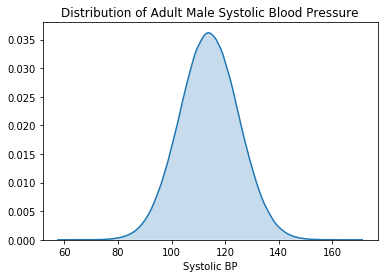

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pop = int(1.5*10**6)
# Use numpy to generate a normal distribution of the 
sys_pop = np.random.normal(loc=114, scale=11, size=pop)

fig, ax = plt.subplots()

sns.kdeplot(sys_pop, ax=ax, shade=True)
ax.set_title('Distribution of Adult Male Systolic Blood Pressure')
ax.set_xlabel('Systolic BP');

Let's then imagine we develop an effective manner of random sampling, and simulate with numpy. Our sample size is 40 people.


In [55]:
sample_size = 40
sample = np.random.choice(sys_pop, sample_size)

# We can look at the distribution of the values in the sample.

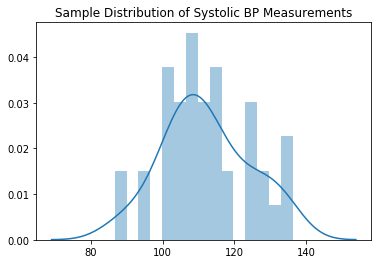

In [56]:
fig, ax = plt.subplots()
sns.distplot(sample, ax=ax, bins=15)
ax.set_title('Sample Distribution of Systolic BP Measurements');

We can then calculate the sample statistics:

In [57]:
print(f'Sample mean: {sample.mean()}')
print(f'Sample standard deviation: {sample.std()}')
print(f'Sample median: {np.median(sample)}')

Sample mean: 112.0609384442475
Sample standard deviation: 12.031223303443378
Sample median: 110.2595231513684


If we repeated this process, taking samples of the population repeatedly, we would get an array of sample statistics.

In [64]:
number_of_samples = 1000
sample_size = 40
sample_stats = []

for _ in range(number_of_samples):
    sample = np.random.choice(sys_pop, sample_size)
    # collect the mean of each of the 1000 samples in sample stats
    sample_stats.append(sample.mean())


The collection of sample stats represents our __sampling distribution__

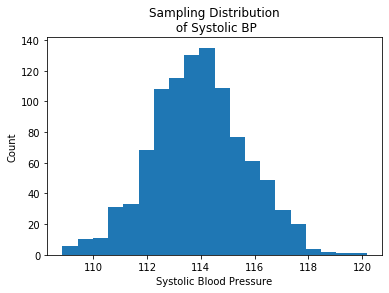

In [65]:
fig, ax = plt.subplots()
ax.hist(sorted(sample_stats), bins=20)
ax.set_title('Sampling Distribution\n of Systolic BP')
ax.set_xlabel("Systolic Blood Pressure")
ax.set_ylabel('Count');

# 3. Central Limit Theorem

An interesting property of this sampling distribution:
    
As we continue to sample, the mean of the sampling distribution gets closer and closer to the population mean.

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution, no matter the underlying distribution!

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

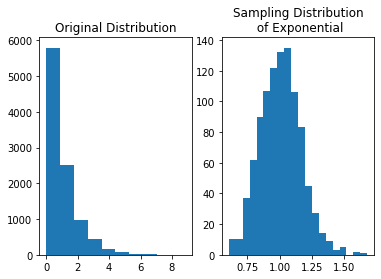

In [73]:
exponential = np.random.exponential(size = 10000)
number_of_samples = 1000
sample_size = 40
sample_stats = []

for _ in range(number_of_samples):
    sample = np.random.choice(exponential, sample_size)
    # collect the mean of each of the 1000 samples in sample stats
    sample_stats.append(sample.mean())
    
fig, ax = plt.subplots(1,2)
ax[0].hist(exponential)
ax[0].set_title('Original Distribution')
ax[1].hist(sorted(sample_stats), bins=20)
ax[1].set_title('Sampling Distribution\n of Exponential');

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

As we will see in hypothesis testing, pairing this theorem with the Empirical rule will be very powerful.

![empirical](img/empirical_rule.png)


Knowing that any sampling distribtion, no matter the underlying population distribution, will approach normality, we will be able to judge, given the empirical rule, how rare a given sample statistic is. 

# Confidence Intervals

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)  
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


In [74]:
def standard_error(distribution, largest_sample_size, population_std=None):
    
    '''
    Calculate the standard errors for a range of sample sizes
    to demonstrate how standard error decreases when sample 
    size increases.
    '''
 
    std_errors = {}
    
    for sample_size in range(50,largest_sample_size+1):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        # Standard error with sample distribution standard deviation 
        # in place of population
        if population_std == None:
            std_err = np.std(sample)/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
        else:
            std_err = population_std/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
    return std_errors
    

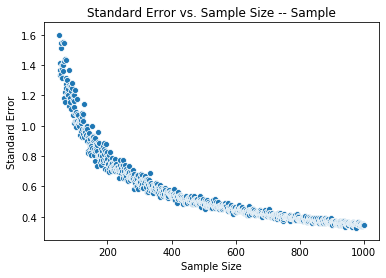

In [75]:
std_errors = standard_error(sys_pop, 1000)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))
ax.set_ylabel('Standard Error')
ax.set_xlabel('Sample Size')
ax.set_title('Standard Error vs. Sample Size -- Sample');

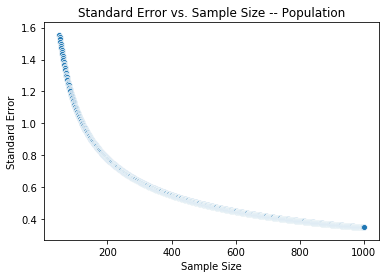

In [77]:
std_errors = standard_error(sys_pop, 1000, population_std=11)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()))
ax.set_ylabel('Standard Error')
ax.set_xlabel('Sample Size')
ax.set_title('Standard Error vs. Sample Size -- Population');

In [ ]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Suppose I weigh a sample of 50 jellybeans from a population of 10000 and find the average weight to be 1.25 grams. Can I take this figure to be a good estimate of the average weight over the whole *population* of jelly beans?

In a word, yes. (What else do I have to go on!?) But what I want now is a more or less precise way of indicating that this figure, though likely close to the real population mean, is inexact.

Natural idea: I'll say I'm confident that the real population value lies in some neighborhood or *interval* around the figure I obtained for my sample.

Notice that:

- The larger my sample, the more confident I may be about the sample's representativeness for the whole population;
- The larger I make the interval, the more confident I may be about the true population value falling within it.

## Interpretation

Here's another example: Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that the true population mean beak length has a 90% chance of being somewhere between 8.6cm and 9.4cm. After all, the true mean either falls in that range or it doesn't. The notion of probability *here* doesn't seem to make much sense. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

## Construction

OK: So how do we construct these intervals?

The confidence interval we construct will depend on the statistics of our sample. It will depend in particular on (i) our sample mean and (ii) our sample size.

It will also depend on the underlying distribution of our data. If our data are **normally** distributed, then we can proceed as follows:

Naturally, the confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center with a step size equal to the standard error, $\large\frac{\sigma}{\sqrt{n}}$. The number of steps we take is determined by which level of confidence we want attached to our interval: In particular, we take $z$-many steps, where $z$ is the (two-tailed) z-score that corresponds to our chosen level of confidence.

If our data are **not** normally distributed, then there are several strategies we might try, some of which ultimately depend on some connection to the normal distribution, like a strategy that appeals to the Central Limit Theorem.

## CIs for Normally Distributed Data

Let's look at an example with data we assume to be normally distributed:

In [94]:
# A normally distributed variable with a
# population size of 1000

pop = list(stats.norm.rvs(size=1000,
                          random_state=42))

In [96]:
# Let's calculate the population mean.

np.mean(pop)

0.01933205582232549

In [91]:
# And the population standard deviation.

pop_std = np.std(pop)
pop_std

0.9787262077473543

Let's say we take a sample of fifty from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The z-score that corresponds to an 80%-confidence interval is:

In [82]:
z = stats.norm.ppf(0.9)
#Why do we want 0.9 here?
z

1.2815515655446004

In [92]:
np.random.seed(42)
sample = np.random.choice(a=pop, size=50)
np.mean(sample)

0.17715311316172172

In [93]:
pop_std / np.sqrt(50) * z

0.17738312474862944

Thus we'd report our estimate of the population mean as 0.177 $\pm$ 0.177, or, equivalently, as (0, 0.354). Note that the true population mean of 0.0193 is in fact in this range.

## CIs for Non-Normally Distributed Data

One of the most commonly used strategies for dealing with non-normally distributed data is to find a way to reduce the problem to one that involves normally distributed data!

[Here](https://file.scirp.org/Html/3-1240887_76758.htm) is a review article that compares several different strategies. (Note that it ultimately recommends a sort of Bayesian method. We'll get to Bayesian reasoning in a later lesson.)

## T-Distribution

![imgguiness](./img/guiness.png)

We can use the normal distribution when either:
* the population standard deviation is known
* the sample size is greater than 30.

If **neither** of these holds true, we need to use the **T-distribution**. The t-distribution is wider and has different critical values for different sample sizes.


PDF of T-distribution: ${\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {x^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!$, where $\Gamma$ denotes the [Gamma Function](https://en.wikipedia.org/wiki/Gamma_function).

parameter: $\nu > 0$ where $\nu$ is degrees of freedom (n-1)

**T distribution becomes closer to Z distribution as n increases**
![zvt](./img/z_vs_t.png)

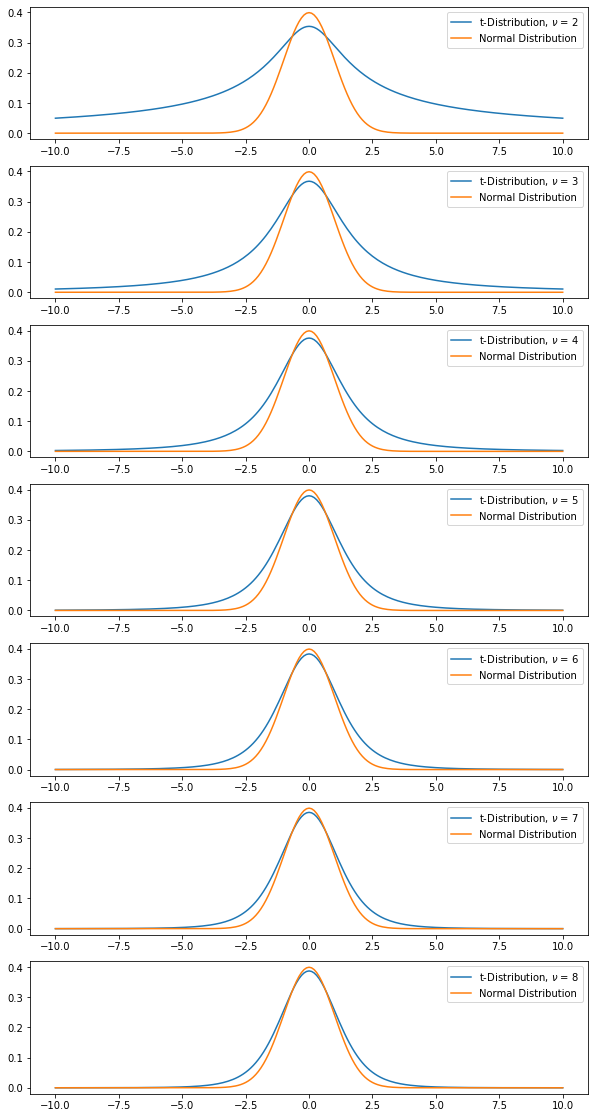

In [85]:
from math import gamma

fig, ax = plt.subplots(7, figsize=(10, 20))

X = np.linspace(-10, 10, 201)
nus = np.arange(2, 9)
y_norm = 1 / np.sqrt(2*np.pi) * np.exp(-0.5 * X**2)

for j in range(7):
    y = gamma((nus[j]+1) / 2) / (np.sqrt(np.pi*nus[j]) * gamma(nus[j] / 2)) *\
(1 + X**2/nus[j])**((-nus[j]+1) / 2)
    ax[j].plot(X, y, label=fr't-Distribution, $\nu$ = {nus[j]}')
    ax[j].plot(X, y_norm, label='Normal Distribution')
    ax[j].legend();

## CIs for T-Distribution

The construction of confidence intervals for the t-Distribution is similar to how they are made for the normal distribution. But instead of z-scores, we'll have t-scores. And since we don't have access to the population standard deviation, we'll make use of the sample standard deviation instead.

left endpt.: $\bar{x} - t\times\frac{s}{\sqrt{n}}$ <br/>
right endpt.: $\bar{x} + t\times\frac{s}{\sqrt{n}}$

### T-Distribution Example

You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?

In [97]:
from scipy import stats

In [98]:
stats.t.ppf(0.95, n-1)

1.6991270265334972

In [99]:
n = 30
mean = 4.8
t_value = stats.t.ppf(0.95, n-1)
margin_error = t_value * 0.4/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)

confidence_interval

(4.6759133066001235, 4.924086693399876)

In [ ]:
# Your turn!

# You're weighing walruses in the Arctic in the attempt to estimate
# the mean weight of the Canadian walrus population. You have a sample
# of 30 walrus weights. The mean of the sample is 2000 lbs. and the
# standard deviation is 200 lbs. Calculate the 80%-confidence interval.
# Calculate the 70%-confidence interval. How do they compare to the
# normal-distribution CIs? (To calculate the latter, just use the 
# sample standard deviation.)




## Binomial Distribution

What if we have a binomial distribution? Suppose we have the following sample statistic:

A survey of 3000 voters found that 1245 approved of the job the governor was doing. How can we express our 95%-confidence level about voter approval of the governor among _all_ voters?

To solve this, we'll once again start with our sample proportion as the center of our CI and step out from it by an amount proportional to the relevant z-score.

But by how much exactly? Forgoing the [proof](https://newonlinecourses.science.psu.edu/stat414/node/208/), the answer *for suitably large samples* (we're relying here on the Central Limit Theorem) is as follows:

left endpt.: $\hat{p} - z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$ <br/>
right endpt.: $\hat{p} + z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

Let's answer our original question about the voters:

We have:

- $\hat{p} = \frac{1245}{3000} = 0.415$;
- $n = 3000$;
- $z = 1.96$.

Therefore:

In [ ]:
p_hat = 0.415
n = 3000
z_voters = stats.norm.ppf(0.975)
step = z_voters * np.sqrt(p_hat * (1-p_hat) / n)

interval = (p_hat - step, p_hat + step)
interval

## CIs for Other Parameters

We might be interested in constructing confidence intervals for other parameters, such as the variance. [This online course](https://newonlinecourses.science.psu.edu/stat414/) has several good examples.

## A Visual Interpretation of Confidence Intervals

Let's see if we can get an idea of how confidence intervals work by constructing a plot:

In [ ]:
# Plotting CIs

intervals = []
for _ in range(30): # number of intervals
    sample = np.random.choice(pop, 10) # sample size = 10
    step = np.std(pop) / np.sqrt(10) # standard error
    x_min = np.mean(sample) - step * z # left endpt. of interval
    x_max = np.mean(sample) + step * z # right endpt. of interval
    intervals.append(np.linspace(x_min, x_max, 30)) # add interval
                                                    # to intervals
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(intervals, range(30), '-') # plot intervals evenly and
                                    # vertically
ax.vlines(np.mean(pop), 0, 30, lw=3);

In [ ]:
# Exercise: turn this into a function that takes as parameters:
# - the population
# - sample size
# - no. of samples / confidence intervals to plot
# - confidence level


def ci_plotter(pop, sample_size, num_samples, conf):
    